輸入立委臉書粉專內容及選舉政見資料

注意!jieba函式庫非內建需要額外下載:https://pypi.org/project/jieba/

In [1]:
import pandas as pd#引入環境內建函式庫pandas並簡寫其為pd\n
import jieba#引入斷詞函式庫jieba
from tqdm import tqdm#視覺化進度條模組，可以看斷詞迭代的進度
fb = pd.read_csv('nysu_10902_2019_research_right.csv')#用函式panda從電腦端資料夾中讀入csv數據庫並命名
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市立委蘇巧慧為例，建立發文文字斷詞表

---



In [2]:
su = fb[fb.page_name == "蘇巧慧"]#將有關劉櫂豪粉專的資料庫從fb數據庫內抓出
su.head(1)#叫出劉櫂豪資料集中第一筆資料來看

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
15937,456170574528072_1635611069917344,456170574528072,蘇巧慧,政治人物,吃雞肉也要看雞走路！\n\n今天早上我到東湖里拜訪呂阿添里長，一到阿添里長自家的果園，首先迎...,蘇巧慧──覺得肚子餓。,photo,https://www.facebook.com/456170574528072/posts...,2019-01-15T09:56:11+0000,2019-01-15T17:56:11,...,蘇巧慧貼文的相片,NaN,322,0,0,0,0,0,6,1


In [3]:
su[su.created_time_taipei == max(su.created_time_taipei)]#抓出發文時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
16811,456170574528072_1976128682532246,456170574528072,蘇巧慧,政治人物,【為台灣，守住民主自由這一席！】\n\n四十年前我爸爸蘇貞昌和所有前輩，勇敢的站出來，打開了...,NaN,video,https://www.facebook.com/456170574528072/posts...,2020-01-10T12:31:11+0000,2020-01-10T20:31:11,...,為台灣，守住民主自由這一席,NaN,17568,0,0,0,0,0,462,265


In [4]:
su[su.created_time_taipei == min(su.created_time_taipei)]#抓出發文時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
15956,456170574528072_1623679901110461,456170574528072,蘇巧慧,政治人物,2019 新年快樂🎉,蘇巧慧更新了封面相片。,photo,https://www.facebook.com/456170574528072/posts...,2019-01-01T05:04:59+0000,2019-01-01T13:04:59,...,蘇巧慧的封面相片,NaN,317,0,0,0,0,0,17,1


In [5]:
su['new_date'] = pd.to_datetime(su['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
su['month_year'] = pd.to_datetime(su['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)
su.head(1)

<ipython-input-5-b74f44c7de6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su['new_date'] = pd.to_datetime(su['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
<ipython-input-5-b74f44c7de6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su['month_year'] = pd.to_datetime(su['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
15937,456170574528072_1635611069917344,456170574528072,蘇巧慧,政治人物,吃雞肉也要看雞走路！\n\n今天早上我到東湖里拜訪呂阿添里長，一到阿添里長自家的果園，首先迎...,蘇巧慧──覺得肚子餓。,photo,https://www.facebook.com/456170574528072/posts...,2019-01-15T09:56:11+0000,2019-01-15T17:56:11,...,322,0,0,0,0,0,6,1,2019-01-15,2019-01


In [7]:
su = su.sort_values(by=['like_count'],ascending=0)#將資料以按讚數進行排列(ascending為0降序排)
su

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
16811,456170574528072_1976128682532246,456170574528072,蘇巧慧,政治人物,【為台灣，守住民主自由這一席！】\n\n四十年前我爸爸蘇貞昌和所有前輩，勇敢的站出來，打開了...,NaN,video,https://www.facebook.com/456170574528072/posts...,2020-01-10T12:31:11+0000,2020-01-10T20:31:11,...,17568,0,0,0,0,0,462,265,2020-01-10,2020-01
16771,456170574528072_1952862971525484,456170574528072,蘇巧慧,政治人物,【感謝1路相挺 巧慧1定贏！】\n\n從上周三抽出幸運號次１號開始，我們就回到 #樹林 #鶯...,蘇巧慧──和林秀雄。,photo,https://www.facebook.com/456170574528072/posts...,2019-12-23T04:29:06+0000,2019-12-23T12:29:06,...,11763,0,0,0,0,0,211,101,2019-12-23,2019-12
16851,456170574528072_1960941430717638,456170574528072,蘇巧慧,政治人物,【大小朋友無畏風雨 ①起挺巧慧！】\n\n今天的紙風車到樹林：蕃薯森林奇遇記活動原本還擔心下...,NaN,photo,https://www.facebook.com/456170574528072/posts...,2019-12-29T11:44:43+0000,2019-12-29T19:44:43,...,10550,0,0,0,0,0,161,74,2019-12-29,2019-12
16747,456170574528072_1925223290956119,456170574528072,蘇巧慧,政治人物,【我新莊，我驕傲！】\n\n我的父親蘇貞昌當年從屏東到台北，一開始就在新莊起家，因此我自己就...,NaN,photo,https://www.facebook.com/456170574528072/posts...,2019-11-30T11:36:47+0000,2019-11-30T19:36:47,...,10377,0,0,0,0,0,223,106,2019-11-30,2019-11
16718,456170574528072_1936063686538746,456170574528072,蘇巧慧,政治人物,12/14（六）新北群英會\n\n來唷來唷，這個週六，我和蘇貞昌院長、鄭文燦市長、吳秉叡都將...,蘇巧慧──和蕭良桁。,photo,https://www.facebook.com/456170574528072/posts...,2019-12-09T13:00:02+0000,2019-12-09T21:00:02,...,10318,0,0,0,0,0,261,172,2019-12-09,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16342,456170574528072_1763555417122908,456170574528072,蘇巧慧,政治人物,正在安排暑期活動了嗎？超越達人職場體驗來了！\n\n想知道一杯好喝的「飲品」是如何做出來的嗎...,NaN,video,https://www.facebook.com/456170574528072/posts...,2019-06-19T04:04:50+0000,2019-06-19T12:04:50,...,117,0,0,0,0,0,1,1,2019-06-19,2019-06
16594,456170574528072_443421926522238,456170574528072,蘇巧慧,政治人物,國會有表現，地方有成績，支持好立委，巧慧留國會！\n\n#樹林 #鶯歌 #新莊西盛,蘇巧慧在「蘇巧慧會做事！ 」發佈了 1 段影片。,video,https://www.facebook.com/chiaohui.su/videos/44...,2019-10-11T01:39:28+0000,2019-10-11T09:39:28,...,114,0,0,0,0,0,1,93,2019-10-11,2019-10
16175,456170574528072_1715147528630364,456170574528072,蘇巧慧,政治人物,探討新聞抄襲與假消息防治，我正在 世新大學 參與 世新大學新聞學系的《小世界公民論壇：灰色地...,蘇巧慧,video,https://www.facebook.com/456170574528072/posts...,2019-04-24T05:24:54+0000,2019-04-24T13:24:54,...,113,0,0,0,0,0,1,0,2019-04-24,2019-04
16172,456170574528072_1716024728542644,456170574528072,蘇巧慧,政治人物,【現正直播中】我正在文博會參觀展覽！,蘇巧慧,video,https://www.facebook.com/456170574528072/posts...,2019-04-25T07:51:49+0000,2019-04-25T15:51:49,...,106,0,0,0,0,0,4,1,2019-04-25,2019-04


In [8]:
su.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)
su

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,16811,456170574528072_1976128682532246,456170574528072,蘇巧慧,政治人物,【為台灣，守住民主自由這一席！】\n\n四十年前我爸爸蘇貞昌和所有前輩，勇敢的站出來，打開了...,NaN,video,https://www.facebook.com/456170574528072/posts...,2020-01-10T12:31:11+0000,...,17568,0,0,0,0,0,462,265,2020-01-10,2020-01
1,16771,456170574528072_1952862971525484,456170574528072,蘇巧慧,政治人物,【感謝1路相挺 巧慧1定贏！】\n\n從上周三抽出幸運號次１號開始，我們就回到 #樹林 #鶯...,蘇巧慧──和林秀雄。,photo,https://www.facebook.com/456170574528072/posts...,2019-12-23T04:29:06+0000,...,11763,0,0,0,0,0,211,101,2019-12-23,2019-12
2,16851,456170574528072_1960941430717638,456170574528072,蘇巧慧,政治人物,【大小朋友無畏風雨 ①起挺巧慧！】\n\n今天的紙風車到樹林：蕃薯森林奇遇記活動原本還擔心下...,NaN,photo,https://www.facebook.com/456170574528072/posts...,2019-12-29T11:44:43+0000,...,10550,0,0,0,0,0,161,74,2019-12-29,2019-12
3,16747,456170574528072_1925223290956119,456170574528072,蘇巧慧,政治人物,【我新莊，我驕傲！】\n\n我的父親蘇貞昌當年從屏東到台北，一開始就在新莊起家，因此我自己就...,NaN,photo,https://www.facebook.com/456170574528072/posts...,2019-11-30T11:36:47+0000,...,10377,0,0,0,0,0,223,106,2019-11-30,2019-11
4,16718,456170574528072_1936063686538746,456170574528072,蘇巧慧,政治人物,12/14（六）新北群英會\n\n來唷來唷，這個週六，我和蘇貞昌院長、鄭文燦市長、吳秉叡都將...,蘇巧慧──和蕭良桁。,photo,https://www.facebook.com/456170574528072/posts...,2019-12-09T13:00:02+0000,...,10318,0,0,0,0,0,261,172,2019-12-09,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,16342,456170574528072_1763555417122908,456170574528072,蘇巧慧,政治人物,正在安排暑期活動了嗎？超越達人職場體驗來了！\n\n想知道一杯好喝的「飲品」是如何做出來的嗎...,NaN,video,https://www.facebook.com/456170574528072/posts...,2019-06-19T04:04:50+0000,...,117,0,0,0,0,0,1,1,2019-06-19,2019-06
920,16594,456170574528072_443421926522238,456170574528072,蘇巧慧,政治人物,國會有表現，地方有成績，支持好立委，巧慧留國會！\n\n#樹林 #鶯歌 #新莊西盛,蘇巧慧在「蘇巧慧會做事！ 」發佈了 1 段影片。,video,https://www.facebook.com/chiaohui.su/videos/44...,2019-10-11T01:39:28+0000,...,114,0,0,0,0,0,1,93,2019-10-11,2019-10
921,16175,456170574528072_1715147528630364,456170574528072,蘇巧慧,政治人物,探討新聞抄襲與假消息防治，我正在 世新大學 參與 世新大學新聞學系的《小世界公民論壇：灰色地...,蘇巧慧,video,https://www.facebook.com/456170574528072/posts...,2019-04-24T05:24:54+0000,...,113,0,0,0,0,0,1,0,2019-04-24,2019-04
922,16172,456170574528072_1716024728542644,456170574528072,蘇巧慧,政治人物,【現正直播中】我正在文博會參觀展覽！,蘇巧慧,video,https://www.facebook.com/456170574528072/posts...,2019-04-25T07:51:49+0000,...,106,0,0,0,0,0,4,1,2019-04-25,2019-04


結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [9]:
doc_names = range(len(su)) #len(liu):看劉櫂豪有幾篇文章
doc_names

range(0, 924)

In [11]:
import numpy as np #引入向量矩陣運算函式庫numpy
su = su.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(su['message'])#list(liu['message']): 把要斷詞的內容轉成 list 格式(有順序性的格式)
su_docs = pd.DataFrame(columns=['jieba_results'])#創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
su_docs['jieba_results'] = su_docs['jieba_results'].astype('str')#原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為
1精確模式:將句子最精確的切開，適合文本分析
2全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。
3搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式：
透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式
jibea.cut_for_search () 是搜索引擎模式
cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。
也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [12]:
words = jieba.lcut(text_list[0], cut_all =False)#精確模式斷詞
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/pf/j1608t111mz1b3qd0qp4r02r0000gn/T/jieba.cache
Loading model cost 0.544 seconds.
Prefix dict has been built successfully.


['【', '為', '台灣', '，', '守住', '民主自由', '這', '一席', '！', '】', '\n', '\n', '四十年', '前', '我', '爸爸', '蘇貞昌', '和', '所有', '前輩', '，', '勇敢', '的', '站', '出來', '，', '打開', '了', '民主', '的', '大門', '，', '到', '今天', '我', '和', '我', '的', '兩個', '孩子', '，', '和', '這片', '土地', '上', '的', '每', '一個', '人', '，', '我們', '可以', '自由', '的', '說', '我們', '想', '說', '的', '話', '，', '做', '自己', '想', '做', '的', '事', '，', '我', '不', '希望', '有', '一天', '我們', '的', '孩子', '，', '必須', '像', '香港', '的', '年', '輕人', '，', '上街', '頭', '流血', '。', '\n', '\n', '我', '，', '蘇巧慧', '，', '我', '代表', ' ', '#', '樹林', ' ', '#', '鶯', '歌', ' ', '#', '新莊', '西盛', '九里', ' ', '這', '一席', '，', '我', '希望', '所有', '的', '鄉親', '朋友', '做', '我', '的', '後', '盾', '，', '我們', '一起', '為', '台灣', '守住', '這', '一席', '。', '\n', '\n', '我', '也', '要', '拜', '託', '大家', '，', '讓', '我們', '的', '政黨票', '多', '一點', '，', '讓', '民主', '進步', '黨', '在', '國會', '113', '席', '可以', '過半', '，', '讓', '更', '多', '力量', '進入', '國會', '，', '和', '蔡', '英文', ' ', 'Tsai', ' ', 'Ing', '-', 'wen', '總統', '，', '和', '我們', '一起', '來', '為', '台

In [15]:
words = jieba.lcut(text_list[0], cut_all =True)#全模式斷詞
print(words)

['【', '為', '台', '灣', '，', '守住', '住民', '民主', '民主自由', '自由', '這', '一席', '！】', '\n', '', '\n', '', '四十', '四十年', '十年', '年前', '我', '爸爸', '蘇', '貞', '昌', '和', '所有', '前', '輩', '，', '勇敢', '的', '站出', '來', '，', '打', '開', '了', '民主', '的', '大', '門', '，', '到', '今天', '我', '和', '我', '的', '兩', '個', '孩子', '，', '和', '這', '片', '土地', '地上', '的', '每', '一', '個', '人', '，', '我', '們', '可以', '自由', '的', '說', '我', '們', '想', '說', '的', '話', '，', '做', '自己', '想', '做', '的', '事', '，', '我', '不', '希望', '有', '一天', '我', '們', '的', '孩子', '，', '必', '須', '像', '香港', '的', '年', '輕', '人', '，', '上街', '頭', '流血', '。', '\n', '', '\n', '', '我', '，', '蘇', '巧', '慧', '，', '我', '代表', '', ' ', '', '#', '樹', '林', '', ' ', '', '#', '鶯', '歌', '', ' ', '', '#', '新', '莊', '西', '盛', '九里', '', ' ', '', '這', '一席', '，', '我', '希望', '所有', '的', '鄉', '親', '朋友', '做', '我', '的', '後', '盾', '，', '我', '們', '一起', '為', '台', '灣', '守住', '這', '一席', '。', '\n', '', '\n', '', '我', '也', '要', '拜', '託', '大家', '，', '讓', '我', '們', '的', '政', '黨', '票', '多', '一', '點', '，', '讓', 

In [14]:
words = jieba.lcut(text_list[923], cut_all = False)
print(words)

['🚗', '樹林', '、', '鶯', '歌', '、', '新莊', '西盛', '的', '開車族們', '看過', '來', '🚗', '\n', '\n', '簡單', '一張', '圖', '\n', '就是', '要', '你', '停車', '資訊', '一把', '罩', '🔍', '\n', '\n', '春節', '期間', '除了', '鶯', '歌', '老街', '附近', '路段', '\n', '其他', '區域', '的', '路邊', '停車', '都', ' ', '#', '暫停', '收費', ' ', '喔', '✨', '\n', '\n', '#', '巧慧報', '你', '知', '系列', '💡', '\n', '#', '小資族', '的', '春節', '小', '確幸', '💰', '\n', '#', '實用', '請', '分享', '👍', '\n', '#', '留言', '說', '說', '你', '要', '去', '哪兒', '玩', '😘']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [16]:
import jieba#引入斷詞模組jieba
from tqdm import tqdm#進度條模組,可輔助觀看迴圈執行進度
import re#引入正規運算式模組re
jieba.load_userdict("su_dict.txt")#建立一個使用者定義詞庫使jieba斷詞結果更精確

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    su_docs = su_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [17]:
su_docs

,jieba_results
0,為 台灣 守住 民主自由 這 一席 四十年 前 我 爸爸 蘇貞昌 和 所有 前輩 勇敢 的...
1,感謝 路 相挺 巧慧 定贏 從 上周三 抽出 幸運號 次 １ 號開始 我們 就 回...
2,大小 朋友 無畏 風雨 ① 起挺巧慧 今天 的 紙風車 到 樹林 蕃薯 森林 奇遇 記...
3,我 新莊 我 驕傲 我 的 父親 蘇貞昌 當年 從 屏東 到 台北 一開始 就 在 新莊 ...
4,/ 六 新北 群英 會 來 唷 來 唷 這個 週六 我 和 蘇貞昌 院長 鄭文燦市 長...
...,...
919,正在 安排 暑期 活動 了 嗎 超越 達人 職場 體驗 來 了 想 知道 一杯 好喝 的 ...
920,國會 有表現 地方 有 成績 支持 好 立委 巧慧 留國會 # 樹林 # 鶯 歌 ...
921,探討 新聞 抄襲 與 假消息 防治 我 正在 世新大學 參與 世新大學 新聞 ...
922,現正 直播 中 我 正在 文博會 參觀 展覽 ！


In [18]:
su['jieba_results'] = su_docs
su_post = su[['new_date','message','jieba_results','like_count']]
su_post

,new_date,message,jieba_results,like_count
0,2020-01-10,【為台灣，守住民主自由這一席！】\n\n四十年前我爸爸蘇貞昌和所有前輩，勇敢的站出來，打開了...,為 台灣 守住 民主自由 這 一席 四十年 前 我 爸爸 蘇貞昌 和 所有 前輩 勇敢 的...,17568
1,2019-12-23,【感謝1路相挺 巧慧1定贏！】\n\n從上周三抽出幸運號次１號開始，我們就回到 #樹林 #鶯...,感謝 路 相挺 巧慧 定贏 從 上周三 抽出 幸運號 次 １ 號開始 我們 就 回...,11763
2,2019-12-29,【大小朋友無畏風雨 ①起挺巧慧！】\n\n今天的紙風車到樹林：蕃薯森林奇遇記活動原本還擔心下...,大小 朋友 無畏 風雨 ① 起挺巧慧 今天 的 紙風車 到 樹林 蕃薯 森林 奇遇 記...,10550
3,2019-11-30,【我新莊，我驕傲！】\n\n我的父親蘇貞昌當年從屏東到台北，一開始就在新莊起家，因此我自己就...,我 新莊 我 驕傲 我 的 父親 蘇貞昌 當年 從 屏東 到 台北 一開始 就 在 新莊 ...,10377
4,2019-12-09,12/14（六）新北群英會\n\n來唷來唷，這個週六，我和蘇貞昌院長、鄭文燦市長、吳秉叡都將...,/ 六 新北 群英 會 來 唷 來 唷 這個 週六 我 和 蘇貞昌 院長 鄭文燦市 長...,10318
...,...,...,...,...
919,2019-06-19,正在安排暑期活動了嗎？超越達人職場體驗來了！\n\n想知道一杯好喝的「飲品」是如何做出來的嗎...,正在 安排 暑期 活動 了 嗎 超越 達人 職場 體驗 來 了 想 知道 一杯 好喝 的 ...,117
920,2019-10-11,國會有表現，地方有成績，支持好立委，巧慧留國會！\n\n#樹林 #鶯歌 #新莊西盛,國會 有表現 地方 有 成績 支持 好 立委 巧慧 留國會 # 樹林 # 鶯 歌 ...,114
921,2019-04-24,探討新聞抄襲與假消息防治，我正在 世新大學 參與 世新大學新聞學系的《小世界公民論壇：灰色地...,探討 新聞 抄襲 與 假消息 防治 我 正在 世新大學 參與 世新大學 新聞 ...,113
922,2019-04-25,【現正直播中】我正在文博會參觀展覽！,現正 直播 中 我 正在 文博會 參觀 展覽 ！,106


NameError: name 'plt' is not defined

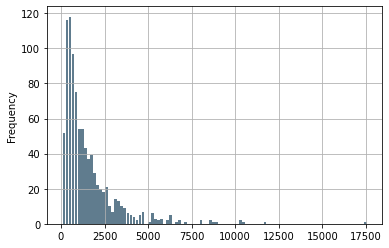

In [21]:
commutes = su_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [22]:
temp = su_post[(su_post['like_count'] <= 20000) & (su_post['like_count'] > 1000)]
temp

,new_date,message,jieba_results,like_count
0,2020-01-10,【為台灣，守住民主自由這一席！】\n\n四十年前我爸爸蘇貞昌和所有前輩，勇敢的站出來，打開了...,為 台灣 守住 民主自由 這 一席 四十年 前 我 爸爸 蘇貞昌 和 所有 前輩 勇敢 的...,17568
1,2019-12-23,【感謝1路相挺 巧慧1定贏！】\n\n從上周三抽出幸運號次１號開始，我們就回到 #樹林 #鶯...,感謝 路 相挺 巧慧 定贏 從 上周三 抽出 幸運號 次 １ 號開始 我們 就 回...,11763
2,2019-12-29,【大小朋友無畏風雨 ①起挺巧慧！】\n\n今天的紙風車到樹林：蕃薯森林奇遇記活動原本還擔心下...,大小 朋友 無畏 風雨 ① 起挺巧慧 今天 的 紙風車 到 樹林 蕃薯 森林 奇遇 記...,10550
3,2019-11-30,【我新莊，我驕傲！】\n\n我的父親蘇貞昌當年從屏東到台北，一開始就在新莊起家，因此我自己就...,我 新莊 我 驕傲 我 的 父親 蘇貞昌 當年 從 屏東 到 台北 一開始 就 在 新莊 ...,10377
4,2019-12-09,12/14（六）新北群英會\n\n來唷來唷，這個週六，我和蘇貞昌院長、鄭文燦市長、吳秉叡都將...,/ 六 新北 群英 會 來 唷 來 唷 這個 週六 我 和 蘇貞昌 院長 鄭文燦市 長...,10318
...,...,...,...,...
442,2019-03-05,蘇貞昌內閣團隊就任不到兩個月，已經解決20多項民怨問題，這就是魄力，與執行力的展現！\n\n...,蘇貞昌 內閣 團隊 就任 不到 兩個 月 已經 解決 多項 民怨 問題 這 就是 魄力 ...,1009
443,2019-07-07,【巧朋友下午茶巧相聚，巧開心！】\n\n這個週五我帶小英總統逛完鶯歌老街，又抽空趕到我們 #...,巧 朋友 下午茶 巧 相聚 巧開心 這個 週五 我 帶小英 總統 逛 完鶯歌 老街 又 抽...,1008
444,2019-03-31,醃脆梅親子DIY 快來鶯歌陶博館體驗！\n\n921大地震那年，為了幫助南投信義鄉受災戶，鶯...,醃 脆梅 親子 快來 鶯 歌 陶博館 體驗 大 地震 那年 為 了 幫助 南投 信...,1006
445,2019-05-05,大家早安！這是今天早上6點的鶯歌青商圓夢盃路跑。\n\n又是全新的一天，我已經開始衝了喔！😆,大家 早安 這是 今天 早上 點的 鶯 歌 青商 圓夢 盃 路 跑 。 又 是 全新 的...,1005


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [23]:
corpus = temp['jieba_results'].values.tolist()

In [24]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [25]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['現在', '我們', '車站', '停車', '停車場', '北大', '簡易', '台灣', '地下', '鳳鳴']
TOP 10 WORDS PER TOPIC #1
['孩子', '地方', '總統', '鄉親', '做事', '台灣', '一起', '大家', '新莊', '我們']
TOP 10 WORDS PER TOPIC #2
['早安', '正在', '花媽', '作伙來', '加油', '樹林', '巧慧來', '市場', '菜市', '直播']
TOP 10 WORDS PER TOPIC #3
['正式', '大家', '巧慧媽媽', '夜市', '活動', '劇團', '樹林', '一起', '開演', '紙風車']
TOP 10 WORDS PER TOPIC #4
['糧倉', '樹林', '保安', '大家', '西路', '民安', '大安', '直行', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #5
['台灣', '巧慧', '夜晚', '免費', '之夜', '地點', '選前', '課綱', '時間', '捐款']
TOP 10 WORDS PER TOPIC #6
['可以', '樹林', '巧慧報', '好料', '店家', '營業', '資訊', '大家', '地址', '時間']
TOP 10 WORDS PER TOPIC #7
['歐吉桑', '蘇貞昌', '催票', '粽子', '順利', '政府', '一樣', '幼兒園', '文林', '台灣']


In [26]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['新莊', '做事', '總統', '捐款', '國會', '巧慧', '一起', '大家', '我們', '台灣']
TOP 10 WORDS PER TOPIC #1
['大家', '一起', '轉民本', '台灣', '直行', '西盛街', '右轉', '左轉', '西路', '民安']
TOP 10 WORDS PER TOPIC #2
['二段', '地點', '時間', '我們', '保安', '一起', '左轉', '新莊', '樹林', '右轉']
TOP 10 WORDS PER TOPIC #3
['安全', '可以', '教育', '巧慧', '教育部', '我們', '一起', '孩子', '課綱', '大家']
TOP 10 WORDS PER TOPIC #4
['一個', '大家', '地方', '學校', '政府', '一起', '蘇貞昌', '孩子', '我們', '台灣']
TOP 10 WORDS PER TOPIC #5
['可以', '文化路', '我們', '山路', '路口', '中正', '一起', '大家', '右轉', '左轉']
TOP 10 WORDS PER TOPIC #6
['新北市', '樹林', '努力', '做事', '地方', '爭取', '一起', '鄉親', '大家', '我們']
TOP 10 WORDS PER TOPIC #7
['重要', '官方', '加入', '巧慧', '今天', '可以', '我們', '大家', '台灣', '一起']


In [29]:
politics_su = politics[politics.姓名 == "蘇 巧 慧"].政見.to_string()
politics_su = re.sub(re_punctuation, "", politics_su)
politics_su = re.sub(r'[0-9]','',politics_su)
politics_su = re.sub(r'[a-zA-Z]','',politics_su)
jieba.load_userdict("su_dict.txt")
words = jieba.lcut(politics_su, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '為', '孩子', '找', '未來', '的', '路', ' ', '我', '是', '蘇巧慧', '，', '我', '是', '兩個', '孩子', '的', '媽媽', '，', '也', '是', '教育', '基金', '會', '的', '執行長', '，', '這些', '年', '對', '於', ' ', '教育', '工', '...']


In [31]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['蘇巧慧', '媽媽', '孩子', '基金', '未來', '執行長', '這些', '教育', '兩個']
TOP 10 WORDS PER TOPIC #1
['蘇巧慧', '媽媽', '孩子', '執行長', '未來', '教育', '兩個', '這些', '基金']
TOP 10 WORDS PER TOPIC #2
['蘇巧慧', '媽媽', '孩子', '執行長', '基金', '未來', '這些', '兩個', '教育']
TOP 10 WORDS PER TOPIC #3
['蘇巧慧', '媽媽', '孩子', '基金', '這些', '教育', '兩個', '執行長', '未來']
TOP 10 WORDS PER TOPIC #4
['蘇巧慧', '媽媽', '執行長', '基金', '未來', '這些', '教育', '兩個', '孩子']
TOP 10 WORDS PER TOPIC #5
['蘇巧慧', '孩子', '執行長', '基金', '未來', '這些', '教育', '兩個', '媽媽']
TOP 10 WORDS PER TOPIC #6
['蘇巧慧', '媽媽', '孩子', '未來', '基金', '執行長', '這些', '教育', '兩個']
TOP 10 WORDS PER TOPIC #7
['媽媽', '孩子', '執行長', '基金', '未來', '這些', '教育', '兩個', '蘇巧慧']
